In [1]:
import numpy as np
import healpy as hp
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = (10,10)
path0 = '/home/sambit/Downloads/PyStoch-master/src/NPY_files/'

### Fisher Matrix

In [2]:
## Run This only once to save the Broadband fisher matrix:

# Fisher = np.zeros((3072,3072), dtype = 'complex128')
# for i in range(8):
#     filename = 'Fisher_' + str(i+1) + '.npy'
#     path = path0 + filename
#     tmp = np.load(path, allow_pickle = True)
#     Fisher += tmp

# np.save(path0 + 'Fisher_40_1800Hz.npy', Fisher)

Fisher = np.load(path0 + 'Fisher_40_1800Hz.npy', allow_pickle = True)

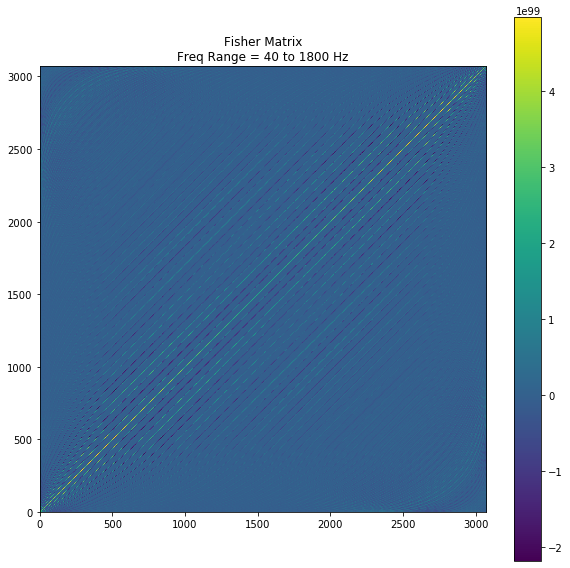

In [3]:
plt.imshow(np.real(Fisher))
plt.gca().invert_yaxis()
plt.title('Fisher Matrix\nFreq Range = 40 to 1800 Hz')
plt.colorbar()
plt.savefig('/home/sambit/Downloads/PyStoch-master/figures/Broadband_Fisher_Matrix_40_1800Hz.png')
plt.show()

In [4]:
## CHECKS!

# Check if Hermitian!
print('Check for Fisher Matrix is Hermitian: ', np.allclose(np.real(Fisher), np.conjugate(np.real(Fisher).T)))
# Check if positive semi-definite!
print('Check for Fisher Matrix is positive semi-definite: ', not(np.any(np.linalg.eigvals(np.real(Fisher)) < 0)))

Check for Fisher Matrix is Hermitian:  True
Check for Fisher Matrix is positive semi-definite:  True


In [5]:
noise = np.random.multivariate_normal(np.zeros(3072),np.real(Fisher))
np.save(path0 + 'Noise_map.npy', noise)

/home/sambit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


Mean = -1.9013495130331496e+48
Var = 5.13162511474022e+49


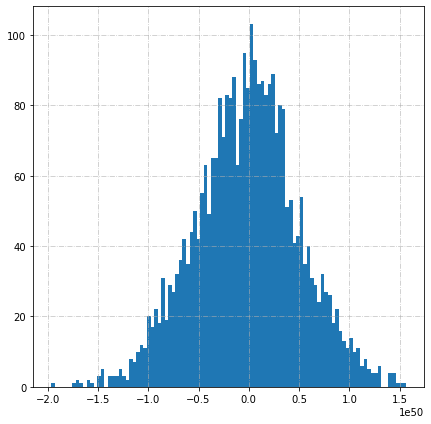

In [44]:
import scipy.stats

param = scipy.stats.distributions.norm.fit(noise)
print('Mean = {}\nVar = {}'.format(param[0],param[1]))

plt.figure(figsize = (7,7))
plt.hist(noise, bins = 100)
plt.grid(linestyle = '-.', alpha = 0.7)
plt.show()

### Dirty Map 

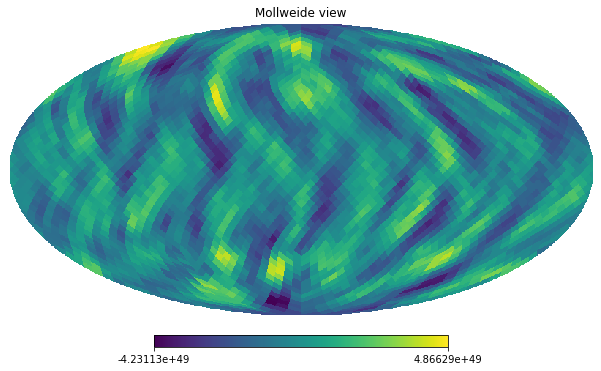

In [27]:
## Run this only once to save the broadband Injection Map

# map_dirty = np.zeros((1,3072), dtype = 'complex128')
# for i in range(4):
#     filename = 'Dirty_Map_' + str(i+1) + '.npy'
#     path = path0 + filename
#     tmp = np.load(path, allow_pickle = True)
#     map_dirty += tmp

# np.save('/home/sambit/Downloads/PyStoch-master/src/NPY_files/Dirty_Map_40_1800Hz.npy', map_dirty)

map_dirty = np.squeeze(np.load(path0 + 'Dirty_Map_40_1800Hz.npy', allow_pickle = True))
hp.mollview(np.real(map_dirty))